In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('ggplot')

# Introduction

This data consists of the Employee Compensation data of the Employees of different Departments in San Francisco. Let us analyze the data a bit and find out the top departments of San Francisco.

# Let us take a look at the data

In [2]:
employee=pd.read_csv('employee-compensation.csv')
employee

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2013,1,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,...,37216,123841.28,76853.77,14922.05,215617.10,24574.98,14920.13,3589.87,43084.98,258702.08
1,Fiscal,2014,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,261.0,"Laborers, Local 261",7500,Semi-Skilled & General Labor,...,24950,61137.60,7341.04,9218.74,77697.38,14897.71,12516.70,6117.99,33532.40,111229.78
2,Fiscal,2016,2,"Public Works, Transportation & Commerce",AIR,AIR Airport Commission,790.0,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,27447,41192.82,0.00,390.00,41582.82,6996.41,11308.96,3200.69,21506.06,63088.88
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,42001,66993.68,26633.83,4494.98,98122.49,21231.91,13417.45,7449.63,42098.99,140221.48
4,Fiscal,2013,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,...,22142,74260.80,0.00,0.00,74260.80,13522.95,11989.39,5977.19,31489.53,105750.33
5,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,...,56724,141778.27,0.00,0.00,141778.27,31106.23,11435.72,9499.81,52041.76,193820.03
6,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790.0,"SEIU - Miscellaneous, Local 1021",1900,Purchasing & Storekeeping,...,40114,51152.50,25724.87,4312.70,81190.07,13299.95,11782.99,6492.68,31575.62,112765.69
7,Fiscal,2015,1,Public Protection,DAT,DAT District Attorney,790.0,"SEIU - Miscellaneous, Local 1021",8100,Legal & Court,...,50362,27351.96,0.00,0.00,27351.96,6135.08,5786.71,2090.58,14012.37,41364.33
8,Fiscal,2013,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34064,72115.16,0.00,2122.80,74237.96,13518.68,12803.48,6202.78,32524.94,106762.90
9,Fiscal,2015,6,General Administration & Finance,REG,REG Elections,790.0,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,49417,391.25,322.78,0.00,714.03,0.00,119.75,55.28,175.03,889.06


Let's see which departments are involved

In [3]:
employee['Department'].unique()

array(['FIR Fire Department', 'MTA Municipal Transprtn Agncy',
       'AIR Airport Commission', 'DPW GSA - Public Works',
       'DAT District Attorney', 'HSA Human Services Agency',
       'REG Elections', 'DPH Public Health', 'MYR Mayor',
       'CHF Children;Youth & Families', 'DT GSA - Technology',
       'LIB Public Library', 'POL Police', 'REC Recreation & Park Commsn',
       'DBI Building Inspection', 'CRT Superior Court',
       'HRD Human Resources', 'ADM Gen Svcs Agency-City Admin',
       'HHP Hetch Hetchy Water & Power', 'FAM Fine Arts Museum',
       'HHP CleanPowerSF', 'CPC City Planning',
       'TTX Treasurer/Tax Collector', 'PUB Public Utilities Bureaus',
       'SHF Sheriff', 'WWE Wastewater Enterprise',
       'CSS Child Support Services', 'WTR Water Enterprise',
       'CON Controller', 'PDR Public Defender',
       'HSS Health Service System', 'RNT Rent Arbitration Board',
       'DEM Emergency Management', 'CAT City Attorney', 'ENV Environment',
       'PRT Port'

In [4]:
employee['Organization Group'].unique()

array(['Public Protection', 'Public Works, Transportation & Commerce',
       'Human Welfare & Neighborhood Development',
       'General Administration & Finance', 'Community Health',
       'Culture & Recreation', 'General City Responsibilities'],
      dtype=object)

# Analysis

In [5]:
# Employee of which organizations get higher compensations(mean compensations)
# Employee of which department get higher salaries
# Employees of which organization/department get higher health compensations
# Employees of which department do most overtimes 
# Which departments pay their employees most after retirement
# Percentage of benefits of employees of different organizations
# Distribution of different kinds of benefits by different organizations(heatmap)

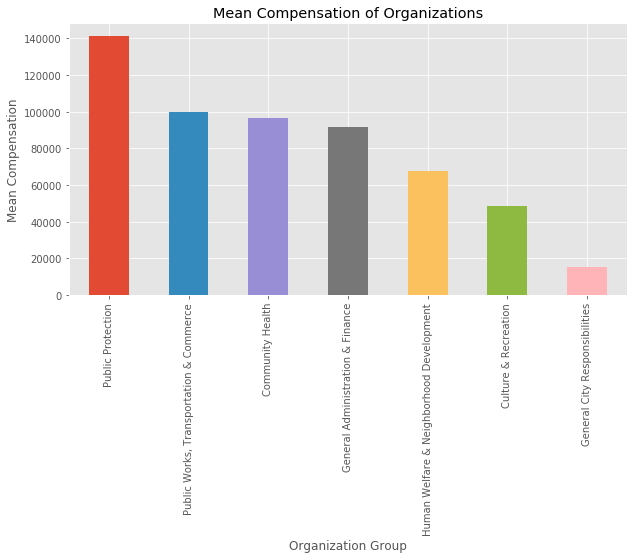

In [26]:
# Employees of which organizations get higher compensations
employee.groupby('Organization Group')['Total Compensation'].agg('mean').sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('Mean Compensation')
plt.title('Mean Compensation of Organizations')
plt.show()

Of course! Public Protection is the noblest work and its worth paying them higher compensations.

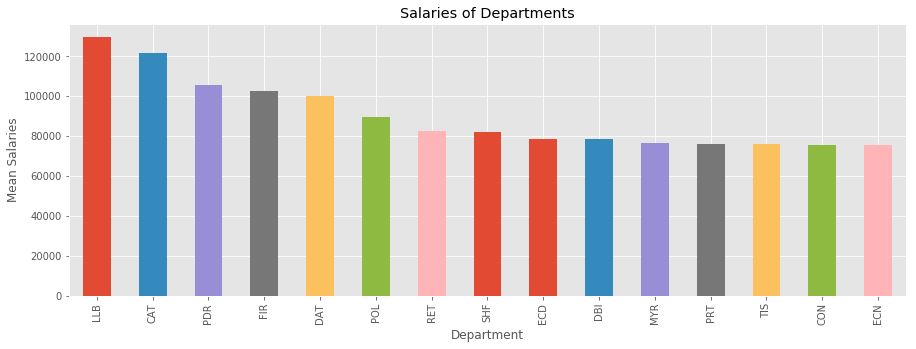

In [76]:
# Employees of which department get high salaries
employee.groupby('Department Code')['Salaries'].agg('mean').sort_values(ascending=False).head(15).plot(kind='bar',figsize=(15,5))
plt.title('Salaries of Departments')
plt.ylabel('Mean Salaries')
plt.xlabel('Department')
plt.show()

LLB Law Library comes in the first place when talking about salaries with CAT City attorneys and PDR Public Defender in the second place. FIR Fire Department holds the fourth place and DAT District Attorney holds the fifth place. Interesting to note that becoming a law officer in San Francisco is connected to higher salaries.  

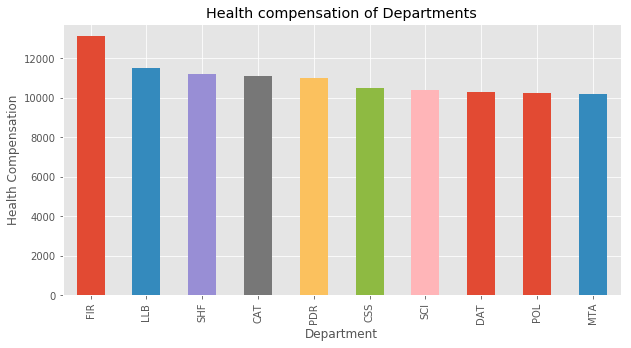

In [35]:
# Employees of which department get higher health compensations
employee.groupby('Department Code')['Health/Dental'].agg('mean').sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,5))
plt.ylabel('Health Compensation')
plt.xlabel('Department')
plt.title('Health compensation of Departments')
plt.show()

As Expected, the fire fighters(FIR) get the greatest health compensations as their lives are more prone to danger. SHF sheriff holds the thrid place as their life is prone to danger too. It is interesting to note that SCI Academy of Sciences holds a place in the top 10. I believe their lives are not more prone to danger than POL Police. However, the difference between them is very small.

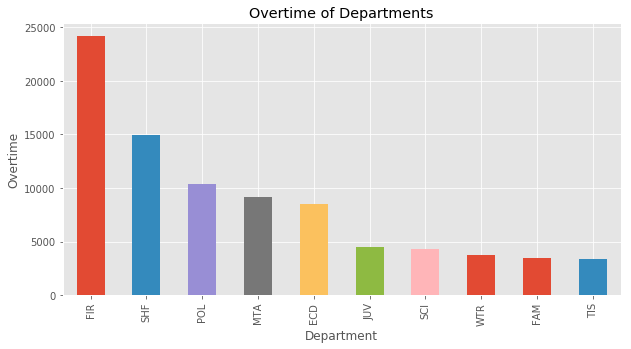

In [39]:
# Employees of which departments do most of the overtimes
employee.groupby('Department Code')['Overtime'].agg('mean').sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,5))
plt.title('Overtime of Departments')
plt.ylabel('Overtime')
plt.xlabel('Department')
plt.show()

WOW! The Fire Department,The Sheriff and The Police hold the first three places as expected. MTA Municipal Transport Agency holds the fourth place with ECD Emergency Management in the fifth place.

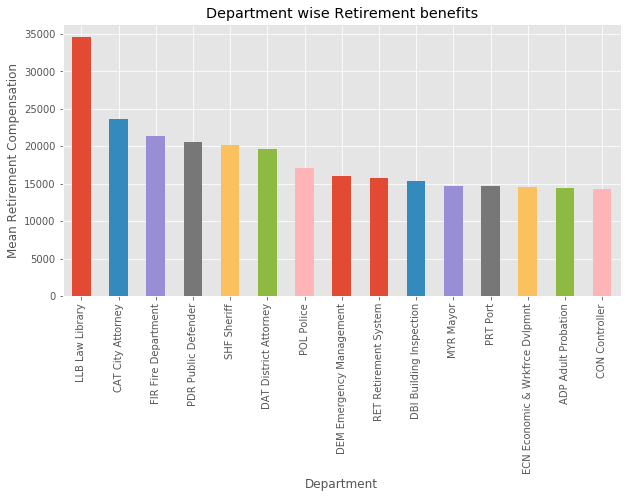

In [51]:
# Which departments pay their employees most after retirement
employee.groupby('Department')['Retirement'].agg('mean').sort_values(ascending=False).head(15).plot(kind='bar',figsize=(10,5))
plt.title('Department wise Retirement benefits')
plt.ylabel('Mean Retirement Compensation')
plt.show()

Okay, The Law Library gets the most compensation after retirement, followed by City Attorney. The surprising fact here is that the Public Protection Department employees are getting paid less than the Law Officers after retirement.  


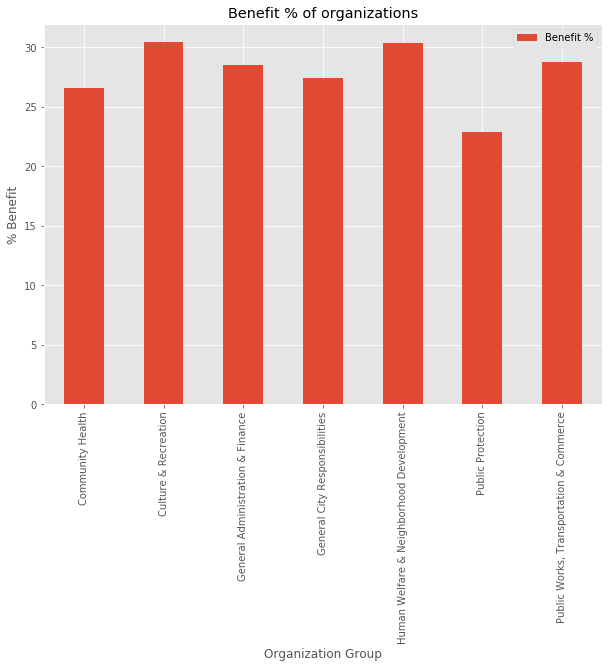

In [75]:
# Percentage of benefits of employees of different organizations
percent=employee.groupby('Organization Group')['Total Benefits','Total Compensation'].agg('sum')
percent['Benefit %']=(percent['Total Benefits']/percent['Total Compensation'])*100
percent.drop(columns=['Total Benefits','Total Compensation'],inplace=True)
percent.plot(kind='bar',figsize=(10,7))
plt.title('Benefit % of organizations')
plt.ylabel('% Benefit')
plt.show()

Culture & Recreation and Human Welfare & Neighbourhood Development hold the top position where employees get maximum benefit. Seems so unfair that Public Protection does not get enough benefit and holds the last place.  

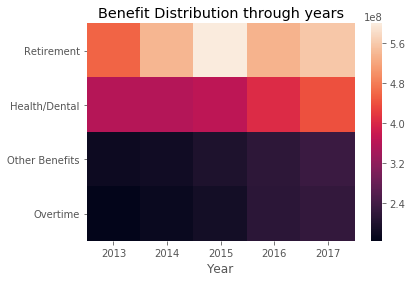

In [91]:
# Distribution of different kinds of benefits by years(heatmap)
pivot=employee.groupby('Year')['Retirement','Health/Dental','Other Benefits','Overtime'].agg('sum').transpose()
sns.heatmap(pivot)
plt.title('Benefit Distribution through years')
plt.show()

As expected, the benefits increase year by year due to increasing expenditure for living. One noticeable fact is that the Employees retired in the year 2015 are very lucky as they got too much money after retirement than any of the former or the latter years.   

# Conclusion

Looks like the Top Departments of San Francisco are Law Attorney, City Attorney, Fire Department, Sheriff, etc. The mean salary of the Law Department is higher than that of the Public Protection Departments which seems a bit unfair. On the other hand, mean Overtime benefit of the Fire Department and the mean Retirement benefit of the Law Attorney Department is a bit high. San Francisco government can cut some of the overtime benefits and retirement benefits of the fire and the law attorney department to maintain a sweet balance in the flow of money in all departments.  

# Thank You for taking a look at this project